# Example 9.2: Otto Cycle (Air-Standard)

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
An Otto cycle with compression ratio of $8$ starts its compression stroke from $p_1=1\ \text{bar}$, $T_1=300\ \text{K}$.  The maximum temperature after combustion is $1200\ \text{K}$.  
Determine:
* (a) $p$-$v$ diagram
* (b) $T$-$s$ diagram
* (c) $T$,$p$ at each state
* (d) $q_{in}$
* (e) $w_{net}$
* (f) $\eta_{th}$

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=3074244&node=10465167&a=685460354&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_K import *
air = idealgas.Properties('Air', unit_system='SI_C')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[1] = Quantity(300,'K')
p[1] = Quantity(1,'bar')
T_max = Quantity(1200,'K')
r = Quantity(8,'')

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Assumptions
  - Treat air as an ideal gas
  - Variable Specific Heat

In [3]:
R = air.R

Calculations();

<IPython.core.display.Latex object>

#### (c) $T$,$p$ at each state 

In [4]:
# Isentropic Compression $1\to2$
s[1] = air.s(T[1],p[1])
v[1] = R*T[1]/p[1]
v[2] = v[1]/r
s[2] = s[1]
T[2] = air.T(s[2],v[2])
p[2] = air.p(s[2],v[2])

# Isochoric Heat Addition $2\to3$
v[3] = v[2]
T[3] = T_max
p[3] = air.p(T=T[3],v=v[3])

# Isentropic Expansion $3\to4$
s[3] = air.s(T[3],v[3])
s[4] = s[3]
v[4] = r*v[3]
T[4] = air.T(v[4],s[4])
p[4] = air.p(v[4],s[4])

Calculations();
states.display()

 Isentropic Compression $1\to2$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isochoric Heat Addition $2\to3$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Isentropic Expansion $3\to4$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

,T,p,v,s
unit,K,kPa,m³/kg,kJ/K/kg
1,300.000000,100.000000,0.861158,6.707700
2,672.711591,1793.897575,0.107645,6.707700
3,1200.000000,3200.000000,0.107645,7.189906
4,579.518321,193.172774,0.861158,7.189906


#### (a) $p$-$v$ diagram 

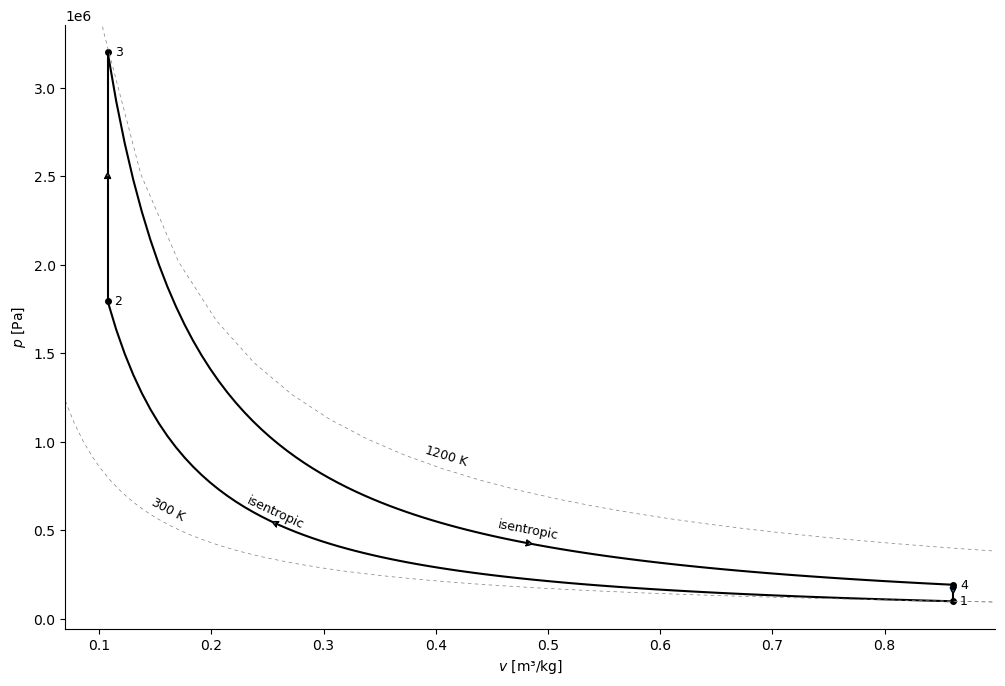

In [5]:
pv = air.pv_diagram()
for i in [1,2,3,4]:
    pv.plot_state(states[i],label_loc='east')
pv.plot_process(states[1],states[2], path='isentropic',label='isentropic',pos=.8)
pv.plot_process(states[2],states[3], path='isochoric')
pv.plot_process(states[3],states[4], path='isentropic',label='isentropic')
pv.plot_process(states[4],states[1], path='isochoric');

pv.plot_isotherm(T[3])
pv.plot_isotherm(T[1],pos=.1);

#### (b) $T$-$s$ diagram 

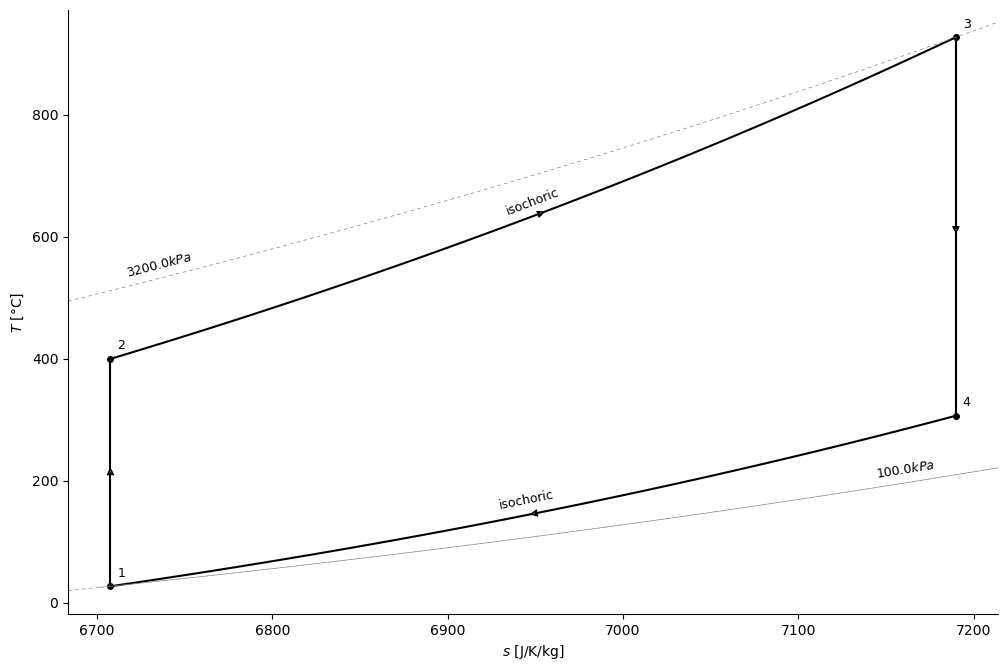

In [6]:
Ts = air.Ts_diagram()
for i in [1,2,3,4]:
    Ts.plot_state(states[i], label_loc='north east')
Ts.plot_process(states[1],states[2], path='isentropic')
Ts.plot_process(states[2],states[3], path='isochoric',label='isochoric')
Ts.plot_process(states[3],states[4], path='isentropic')
Ts.plot_process(states[4],states[1], path='isochoric',label='isochoric');

Ts.plot_isobar(p[3],pos=.1)
Ts.plot_isobar(p[1]);

#### (d) $q_{in}$

In [7]:
# Heat transfer only takes place from $2\to3$ and from $4\to1$
u[2] = air.u(T[2],p[2])
u[3] = air.u(T[3],p[3])

q_2_to_3 = u[3]-u[2]
q_in = q_2_to_3

Calculations();

 Heat transfer only takes place from $2\to3$ and from $4\to1$

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (e) $w_{net}$

In [8]:
u[1] = air.u(T[1],p[1])
u[4] = air.u(T[4],p[4])
q_4_to_1 = u[4]-u[1]
q_out = q_4_to_1

w_net = q_in-q_out

Calculations();

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

#### (f)  $\eta_{th}$

In [9]:
# Thermal efficiency
eta_th = w_net/q_in

Calculations();

 Thermal efficiency

<IPython.core.display.Latex object>

In [10]:
Summary()
Summary(['q_in','w_net','eta_th']);

<IPython.core.display.Latex object>

,T,p,v,u,s
unit,K,kPa,m³/kg,kJ/kg,kJ/K/kg
1,300.000000,100.000000,0.861158,-88.522903,6.707700
2,672.711591,1793.897575,0.107645,188.517327,6.707700
3,1200.000000,3200.000000,0.107645,630.512594,7.189906
4,579.518321,193.172774,0.861158,116.808064,7.189906


<IPython.core.display.Latex object>